In [1]:
import pandas as pd

# Load the three CSV files
df_1_15 = pd.read_csv('./data/classifier_report_1_15.csv')
df_2_15 = pd.read_csv('./data/classifier_report_2_15.csv')
df_0_15 = pd.read_csv('./data/classifier_report_0_15.csv')

# Check the head of the dataframes to understand their structure
df_1_15.head(), df_2_15.head(), df_0_15.head()


(                 Model Dataset  Accuracy  Precision    Recall  F1-Score  \
 0  Logistic Regression    Test  0.901930   0.905623  0.901930  0.901249   
 1  Logistic Regression    Hela  0.355014   0.854605  0.355014  0.443695   
 2        Random Forest    Test  1.000000   1.000000  1.000000  1.000000   
 3        Random Forest    Hela  0.912376   0.902688  0.912376  0.874710   
 4                  SVM    Test  0.996348   0.996373  0.996348  0.996347   
 
    Support  
 0      NaN  
 1      NaN  
 2      NaN  
 3      NaN  
 4      NaN  ,
                  Model Dataset  Accuracy  Precision    Recall  F1-Score  \
 0  Logistic Regression    Test  0.971998   0.972170  0.971998  0.971943   
 1  Logistic Regression    Hela  0.328817   0.838334  0.328817  0.415001   
 2        Random Forest    Test  1.000000   1.000000  1.000000  1.000000   
 3        Random Forest    Hela  0.915989   0.898913  0.915989  0.901921   
 4                  SVM    Test  0.996230   0.996255  0.996230  0.996228   
 

In [2]:
# Remove Model == Random Forest

df_1_15 = df_1_15[df_1_15['Model'] != 'Random Forest']
df_2_15 = df_2_15[df_2_15['Model'] != 'Random Forest']
df_0_15 = df_0_15[df_0_15['Model'] != 'Random Forest']

In [3]:
import matplotlib.pyplot as plt

# Create a summary DataFrame to compare performance differences between Hela and Test datasets for each setting
models = df_1_15['Model'].unique()
datasets = ['Test', 'Hela']
settings = ['[0, 15]', '[1, 15]', '[2, 15]', ]

# Prepare data for plotting
data_for_plot = {
    'Model': [],
    'Setting': [],
    'Dataset': [],
    'Accuracy Difference': []
}


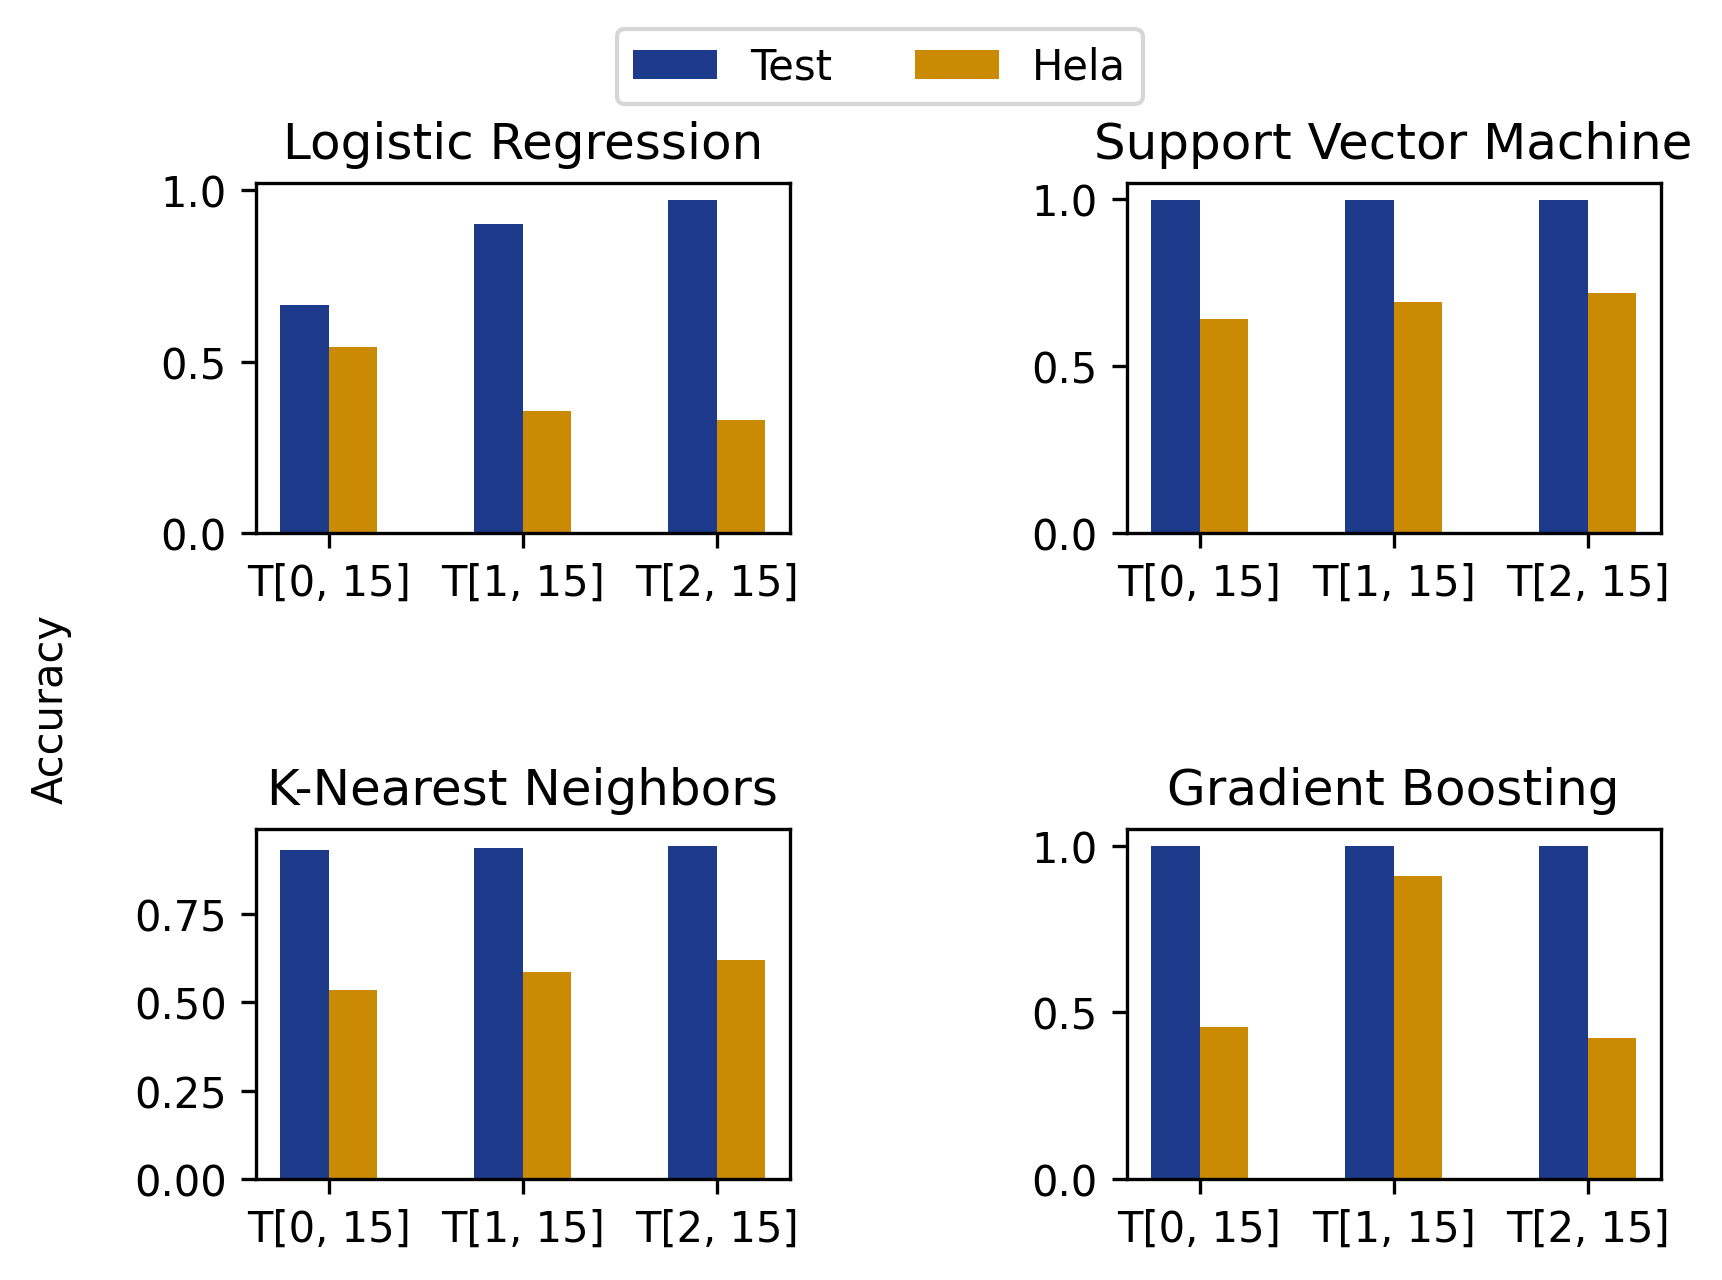

In [13]:
settings = ['T[0, 15]', 'T[1, 15]', 'T[2, 15]', ]

# Creating subplots for each model to show performances on Test and Hela datasets for each setting/model combination using bar plots
# fig, axs = plt.subplots(2, 2, figsize=(13, 10), sharex=True, sharey=True)
fig, axs = plt.subplots(2, 2, figsize=(6.5, 5), sharex=False, sharey=False, dpi=300)
# Flatten axs
axs = axs.flatten()
# Adjust layout
plt.tight_layout(pad=5.0)

# Bar plot settings
width = 0.25  # the width of the bars
settings_positions = range(len(settings))  # setting positions on the x-axis

for i, model in enumerate(models):
    test_accuracies = []
    hela_accuracies = []
    
    for setting, df in zip(settings, [df_0_15, df_1_15, df_2_15]):
        test_acc = df[(df['Model'] == model) & (df['Dataset'] == 'Test')]['Accuracy'].values[0]
        hela_acc = df[(df['Model'] == model) & (df['Dataset'] == 'Hela')]['Accuracy'].values[0]
        
        test_accuracies.append(test_acc)
        hela_accuracies.append(hela_acc)
        
    # Plotting Test accuracies
    axs[i].bar([p - width/2 for p in settings_positions], test_accuracies, width, label='Test', color='#1e3a8a')
    
    # Plotting Hela accuracies
    axs[i].bar([p + width/2 for p in settings_positions], hela_accuracies, width, label='Hela', color='#ca8a04')

    if model == "SVM":
        model = "Support Vector Machine"
    axs[i].set_title(model)
    axs[i].set_xticks(settings_positions)
    axs[i].set_xticklabels(settings)


axs[0].legend(loc='upper right', bbox_to_anchor=(1.7, 1.5), ncol=2)
# Setting labels
# axs[-1].set_xlabel('Setting')
fig.text(0.04, 0.5, 'Accuracy', va='center', rotation='vertical')

plt.show()
